In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:

#setting  seed
import random
random.seed(12345)

In [3]:
df = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")

# Data Pre-processing

In [4]:
print("Train data has ",df.shape[0],'rows and ',df.shape[1],'columns')

Train data has  1460 rows and  81 columns


In [ ]:
df.columns

In [6]:
df.columns = [x.lower() for x in df.columns]

In [7]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

## Missing Values

### Finding Number of missing values in each columns

In [9]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


### Handling Missing Values

In [10]:
# save all categorical columns in list
categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object']

# dataframe with categorical features
data_cat = df[categorical_columns]
# dataframe with numerical features
data_num = df.drop(categorical_columns, axis=1)


In [27]:
data_num=data_num.drop(columns=['id'],axis = 1)

#### Handling missing values in numerical columns

In [11]:


data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    percent= missing_values/data_len
    # drop column if there is more than 50 missing values
    if percent > 0.10:
      print("droping column: {}".format(col))
      data_num = data_num.drop(col, axis = 1)

droping column: lotfrontage


In [12]:
for col in data_num.columns.values:
  data_num = data_num.fillna(data_num[col].median())

#### Handling missing values in categorical columns

In [13]:
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    percent= data_cat[col].isnull().sum()/data_cat[col].isnull().count()
    
    # drop column if there is greater than 10 %
    if percent > 0.10:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 10 percent missing values than fill in with median valu of column
    else:
      mode = data_cat[col].mode()
      data_cat[col] = data_cat[col].fillna(mode)

droping column: alley
droping column: fireplacequ
droping column: poolqc
droping column: fence
droping column: miscfeature


In [14]:
#concat Numerical and Categorial Columns
df = pd.concat([data_num, data_cat], axis=1)

In [15]:
df=df.drop(columns=['id'],axis = 1)

# EDA

## Target Variable

In [16]:
df.saleprice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Saleprice Distribution')

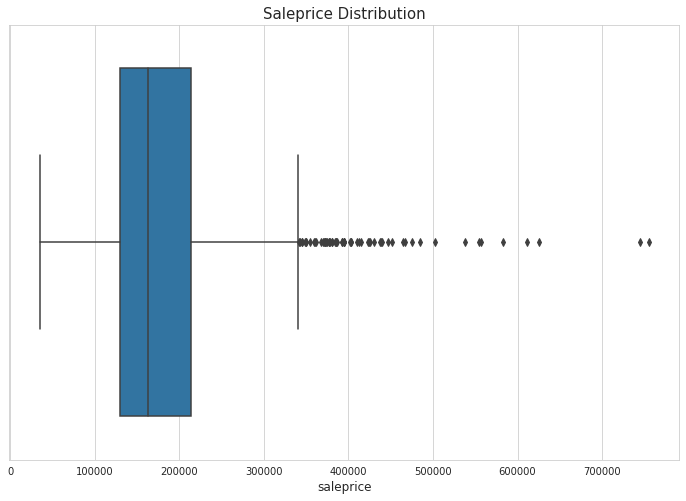

In [17]:
# Find outliers
sorted = df.sort_values('saleprice',ascending=False)

# boxplot appliances
plt.figure(figsize=(12,8))
sns.boxplot(x="saleprice", data=df)
plt.xlabel('saleprice', fontsize=12)
plt.title("Saleprice Distribution", fontsize=15)

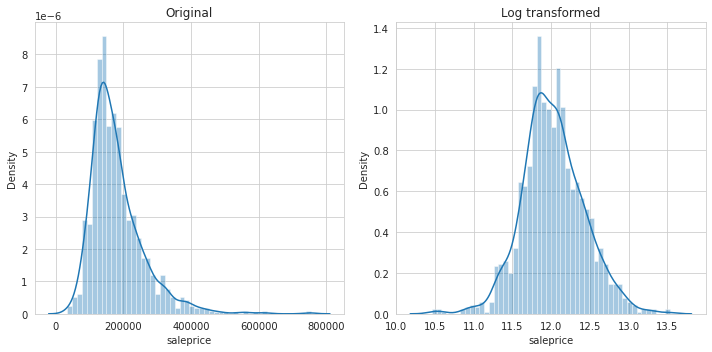

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df.saleprice, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log(df.saleprice), bins=50)
plt.title('Log transformed')

plt.tight_layout()

In [20]:
# Creating New Feature "Log Sale Price"
df['log_saleprice']= np.log(df.saleprice)

<Figure size 1296x1296 with 0 Axes>

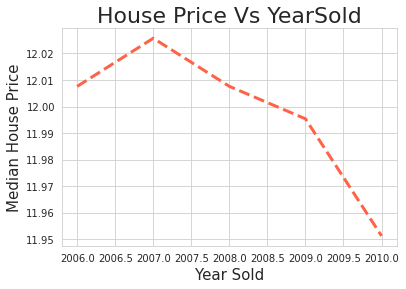

<Figure size 1296x1296 with 0 Axes>

In [21]:
df.groupby('yrsold')['log_saleprice'].median().plot(color = "tomato",linestyle = "--",linewidth=3)
plt.xlabel('Year Sold',fontsize = 15)
plt.ylabel('Median House Price',fontsize =15)
plt.title("House Price Vs YearSold",fontsize=22)
plt.figure(figsize = (18,18))

## Correlation matrix

<Figure size 1296x1296 with 0 Axes>

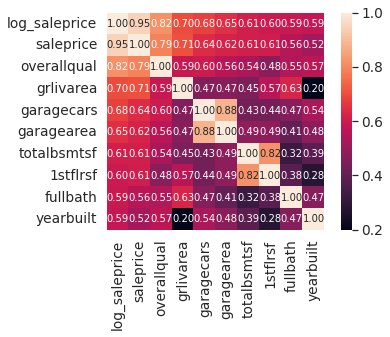

<Figure size 1296x1296 with 0 Axes>

In [22]:
k = 10 #number of variables for heatmap
corr_matrix = df.corr()
cols = corr_matrix.nlargest(k, 'log_saleprice')['log_saleprice'].index

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.figure(figsize = (18,18))

## Checking for Multicollinearity

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data_num, 10))


Top Absolute Correlations
garagecars    garagearea      0.882475
grlivarea     totrmsabvgrd    0.825489
totalbsmtsf   1stflrsf        0.819530
overallqual   saleprice       0.790982
grlivarea     saleprice       0.708624
2ndflrsf      grlivarea       0.687501
bedroomabvgr  totrmsabvgrd    0.676620
bsmtfinsf1    bsmtfullbath    0.649212
garagecars    saleprice       0.640409
grlivarea     fullbath        0.630012
dtype: float64


In [24]:
df[df.columns[:]].corr()['log_saleprice'][:].sort_values(ascending=False)

log_saleprice    1.000000
saleprice        0.948374
overallqual      0.817184
grlivarea        0.700927
garagecars       0.680625
garagearea       0.650888
totalbsmtsf      0.612134
1stflrsf         0.596981
fullbath         0.594771
yearbuilt        0.586570
yearremodadd     0.565608
totrmsabvgrd     0.534422
fireplaces       0.489449
masvnrarea       0.429972
bsmtfinsf1       0.372023
garageyrblt      0.363737
wooddecksf       0.334135
openporchsf      0.321053
2ndflrsf         0.319300
halfbath         0.313982
lotarea          0.257320
bsmtfullbath     0.236224
bsmtunfsf        0.221985
bedroomabvgr     0.209044
screenporch      0.121208
poolarea         0.069798
mosold           0.057329
3ssnporch        0.054900
bsmtfinsf2       0.004832
bsmthalfbath    -0.005149
miscval         -0.020021
overallcond     -0.036868
yrsold          -0.037263
lowqualfinsf    -0.037963
mssubclass      -0.073959
kitchenabvgr    -0.147548
enclosedporch   -0.149050
Name: log_saleprice, dtype: float64

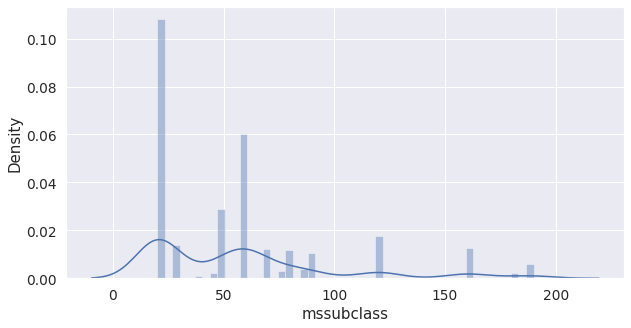

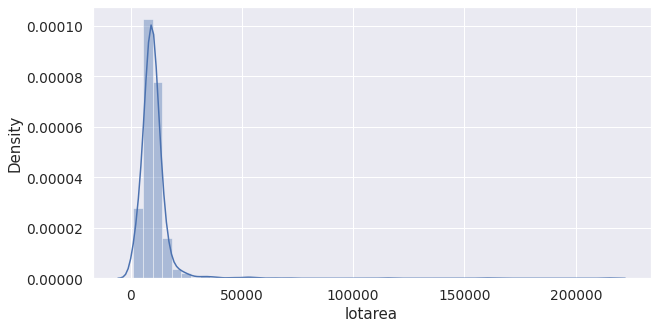

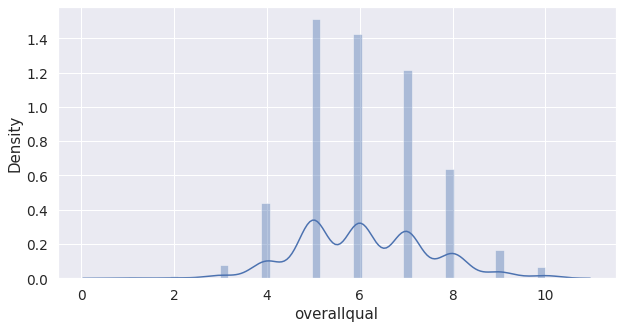

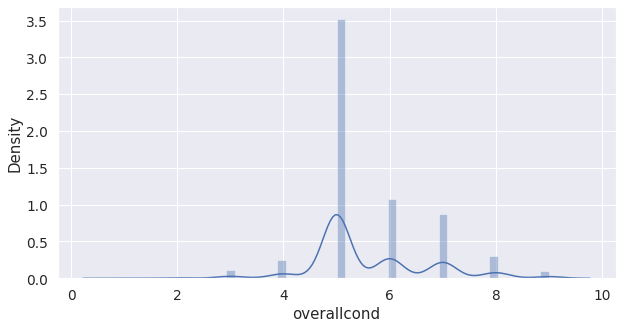

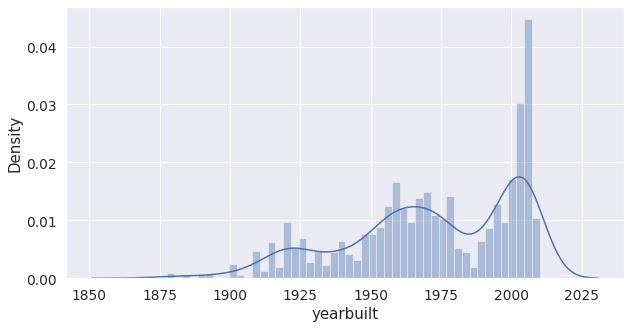

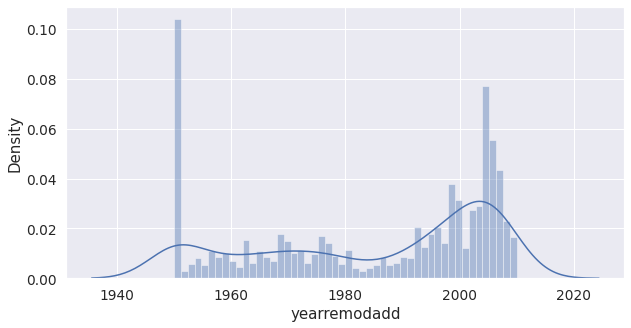

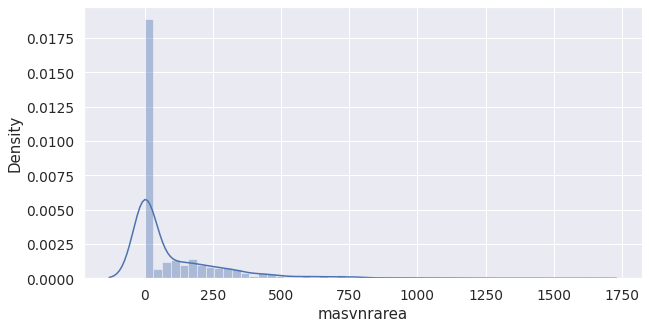

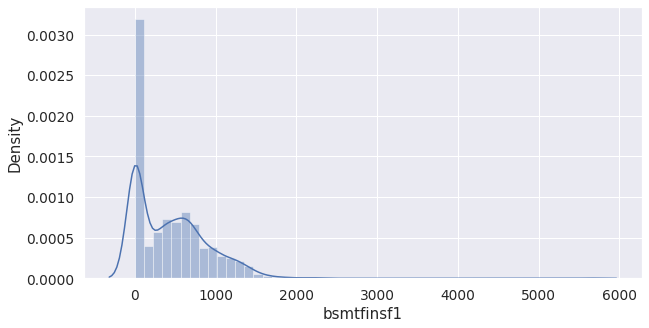

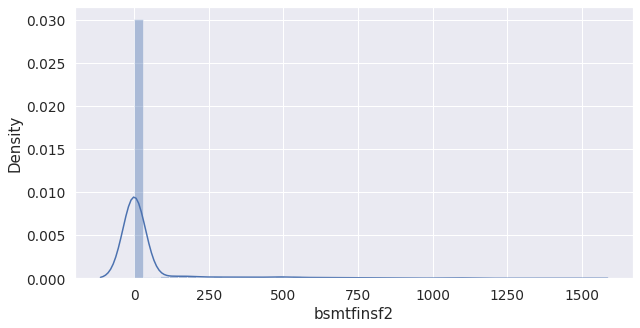

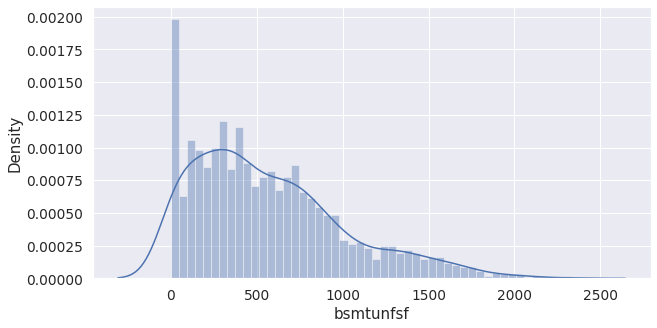

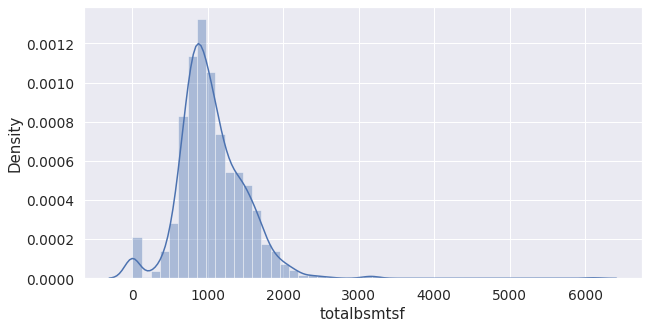

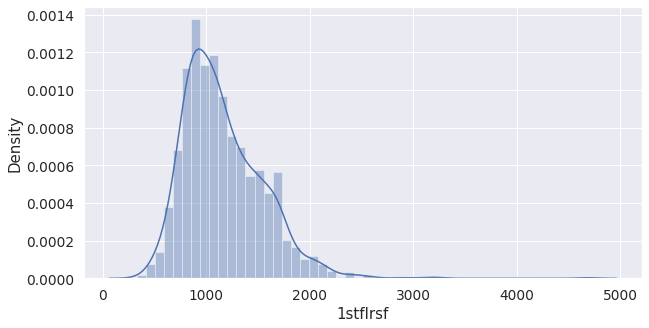

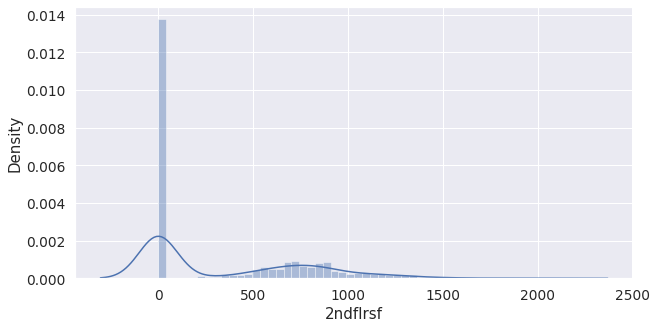

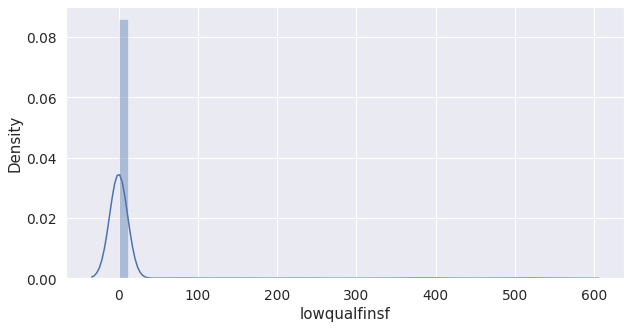

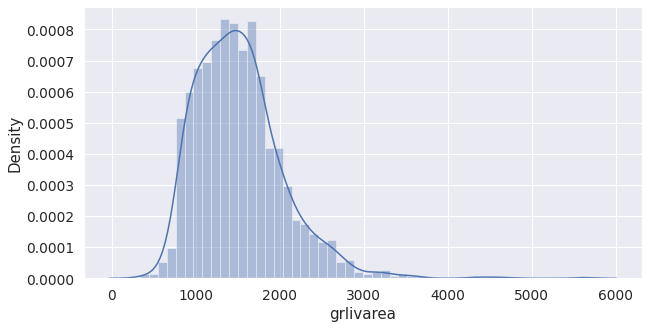

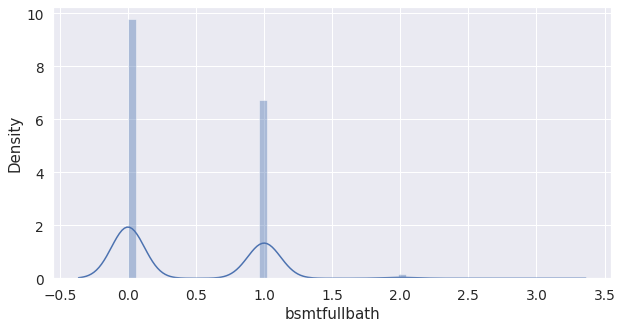

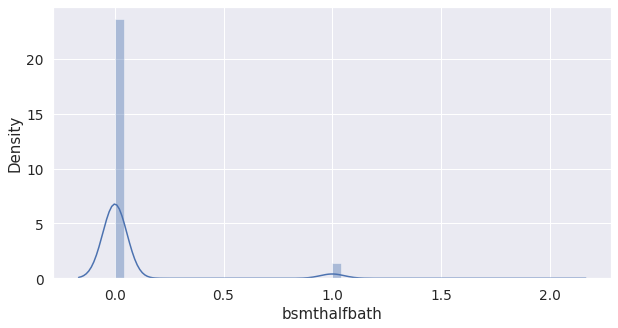

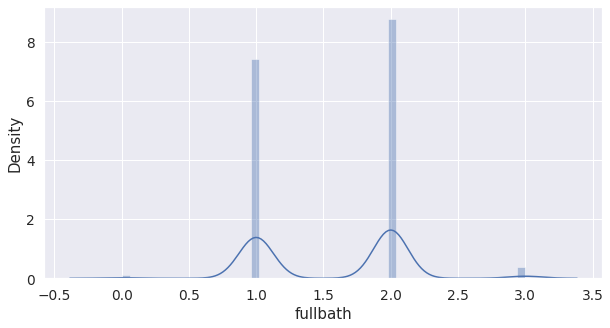

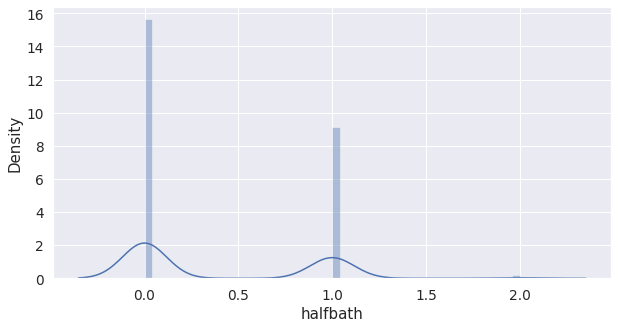

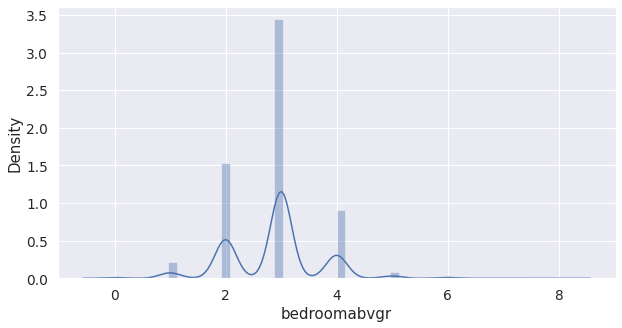

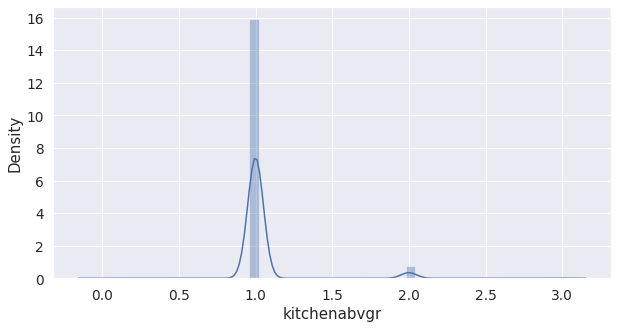

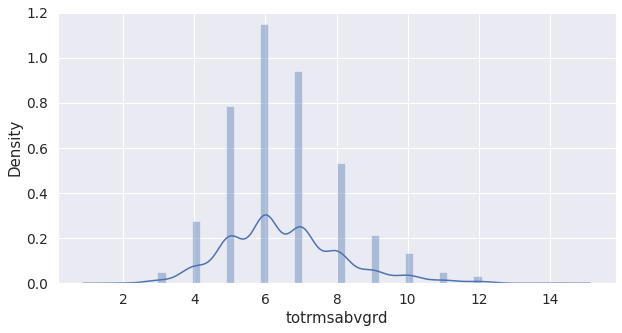

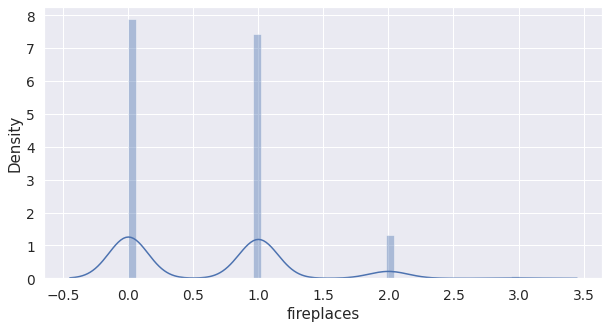

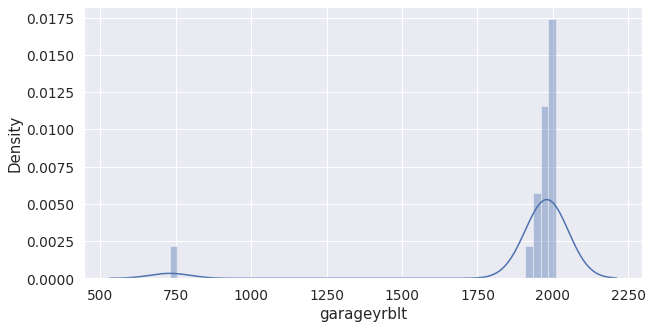

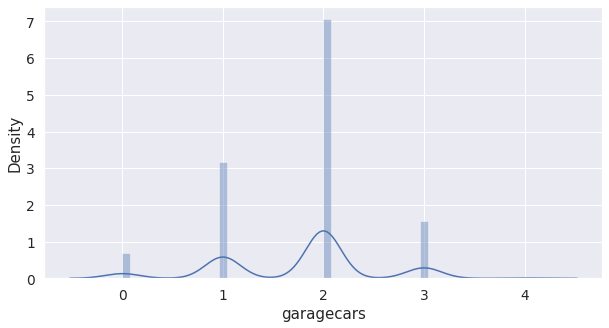

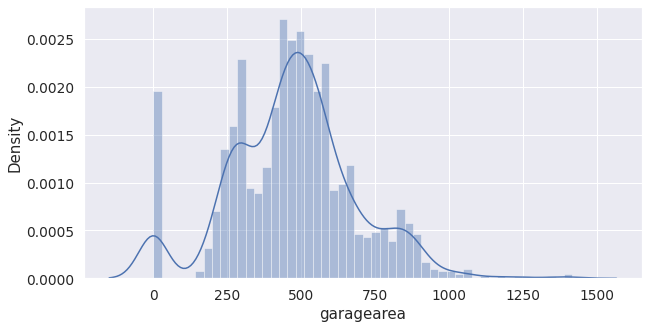

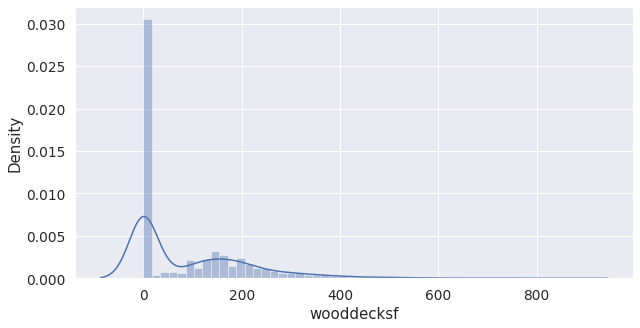

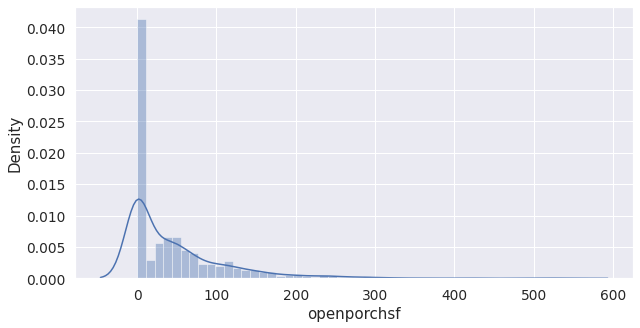

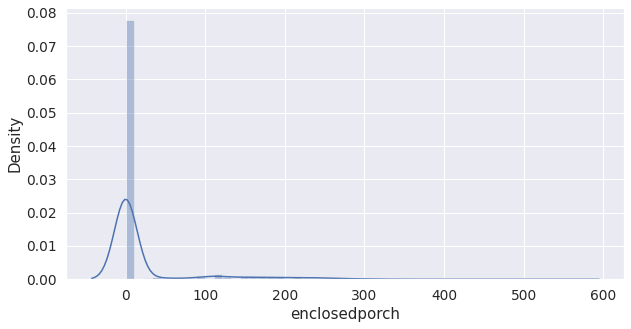

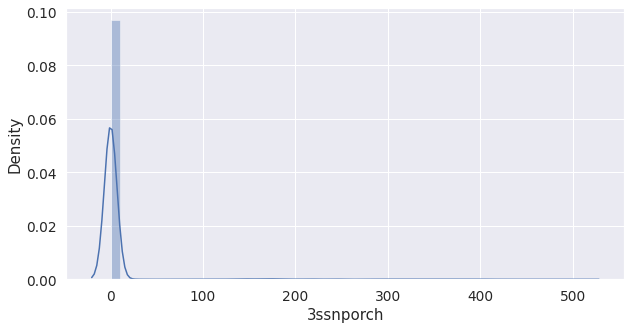

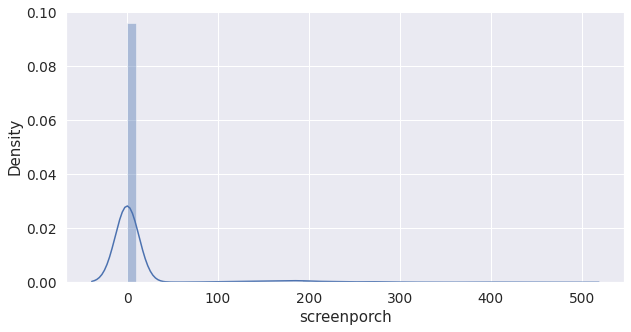

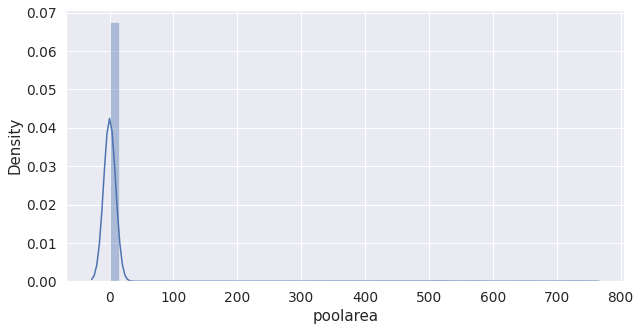

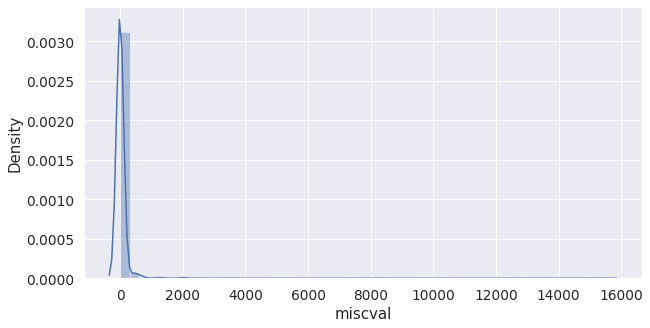

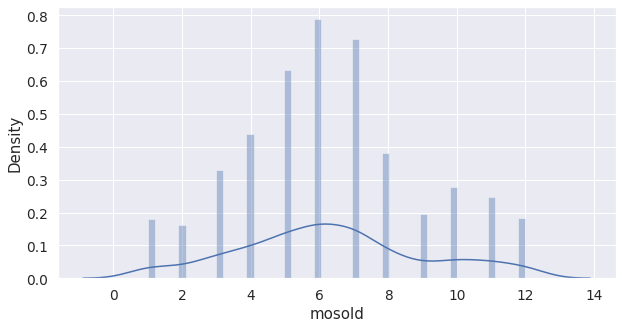

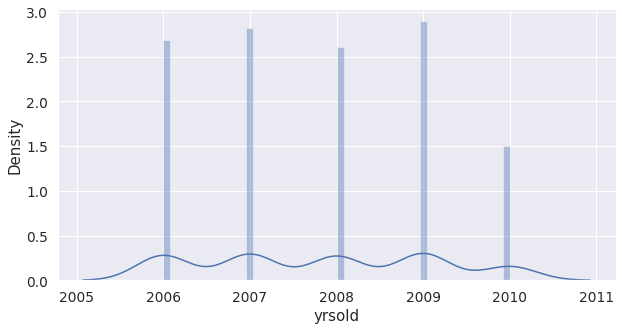

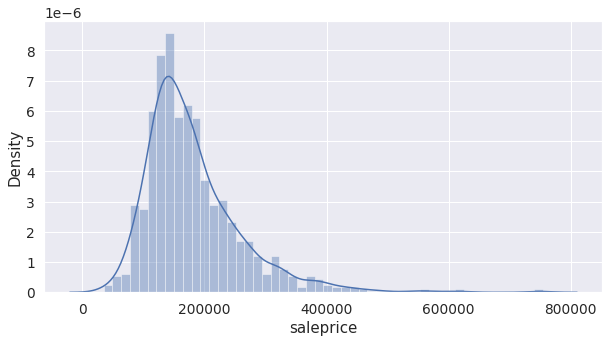

In [28]:
for feature in data_num.columns.values:
  plt.figure(figsize=(10,5))

  # plt.subplot(1,2,1)
  sns.distplot(df[feature], bins=50)



## Relationship between categorical variable and dependent feature SalesPrice

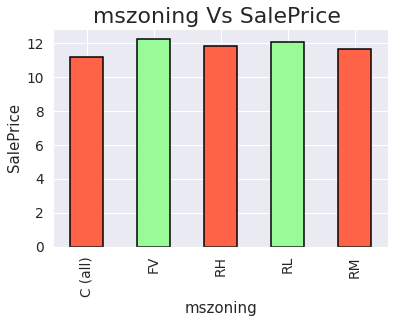

<Figure size 2160x864 with 0 Axes>

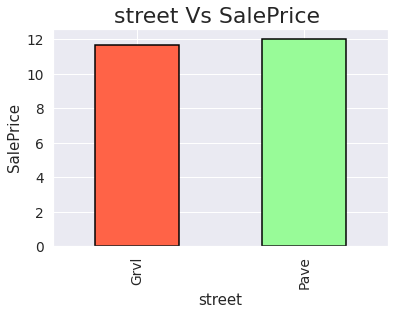

<Figure size 2160x864 with 0 Axes>

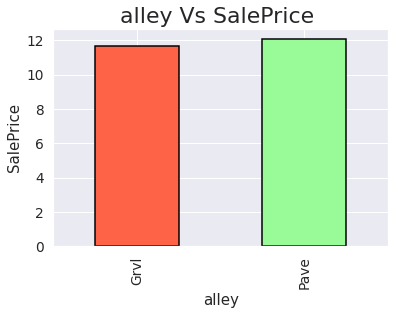

<Figure size 2160x864 with 0 Axes>

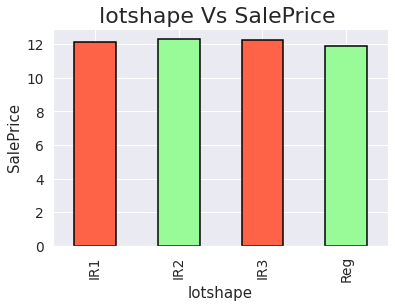

<Figure size 2160x864 with 0 Axes>

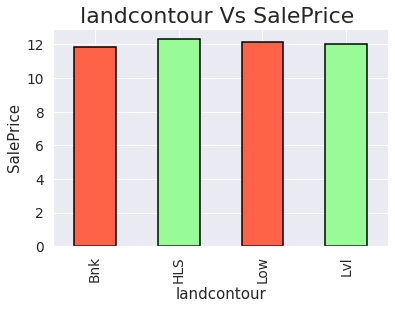

<Figure size 2160x864 with 0 Axes>

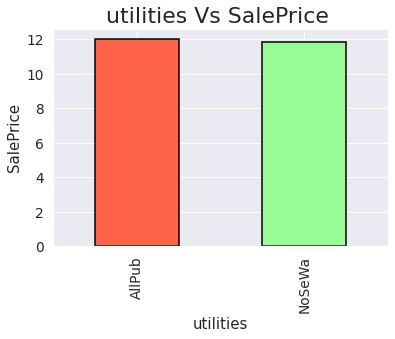

<Figure size 2160x864 with 0 Axes>

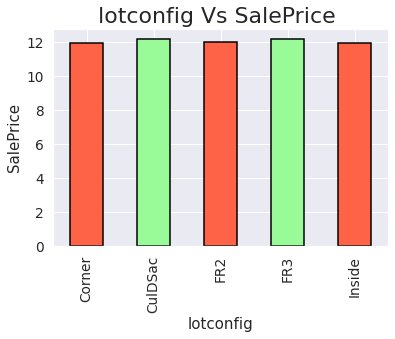

<Figure size 2160x864 with 0 Axes>

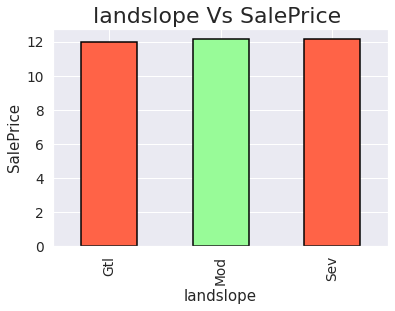

<Figure size 2160x864 with 0 Axes>

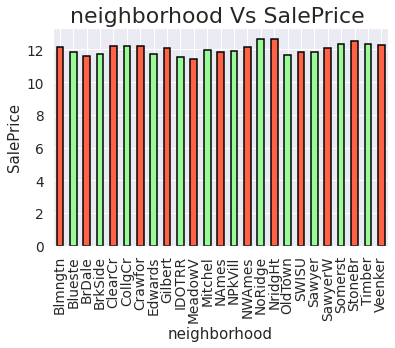

<Figure size 2160x864 with 0 Axes>

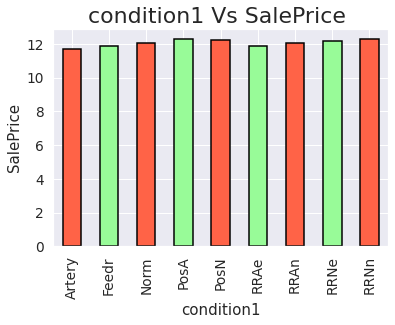

<Figure size 2160x864 with 0 Axes>

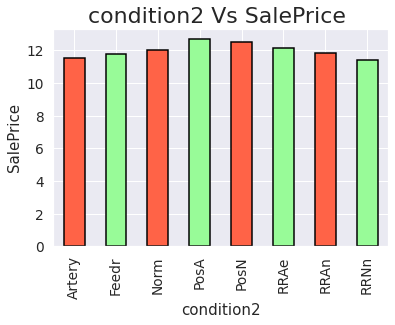

<Figure size 2160x864 with 0 Axes>

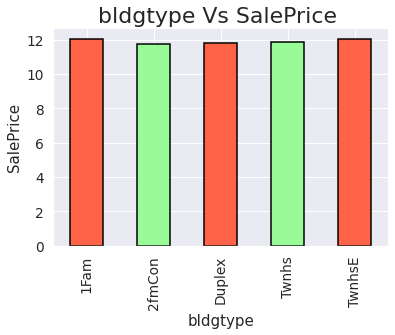

<Figure size 2160x864 with 0 Axes>

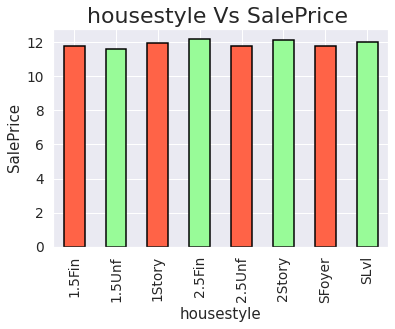

<Figure size 2160x864 with 0 Axes>

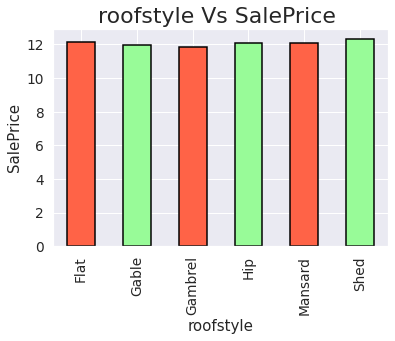

<Figure size 2160x864 with 0 Axes>

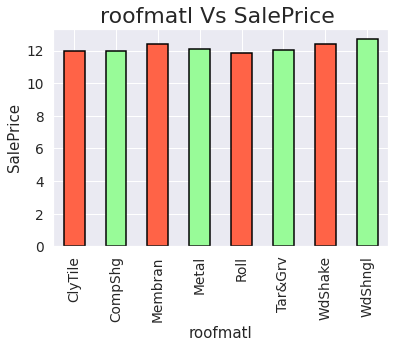

<Figure size 2160x864 with 0 Axes>

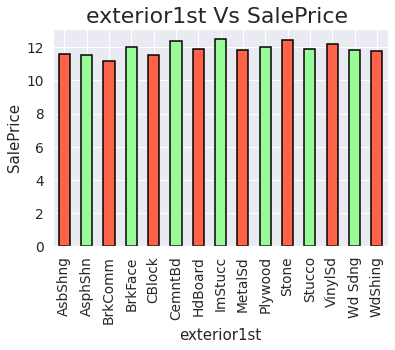

<Figure size 2160x864 with 0 Axes>

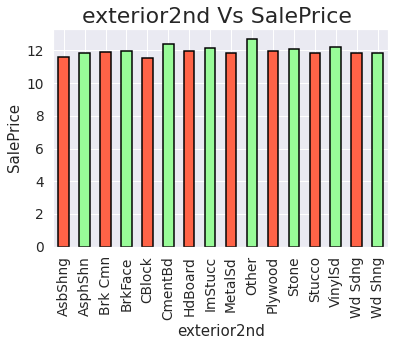

<Figure size 2160x864 with 0 Axes>

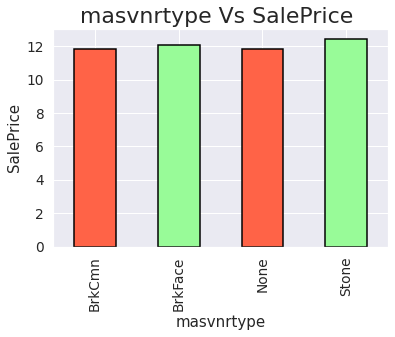

<Figure size 2160x864 with 0 Axes>

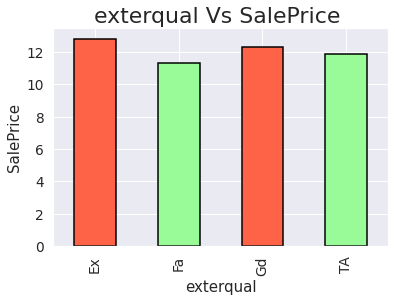

<Figure size 2160x864 with 0 Axes>

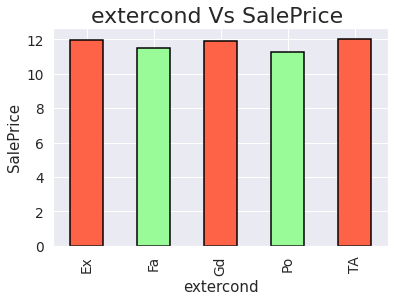

<Figure size 2160x864 with 0 Axes>

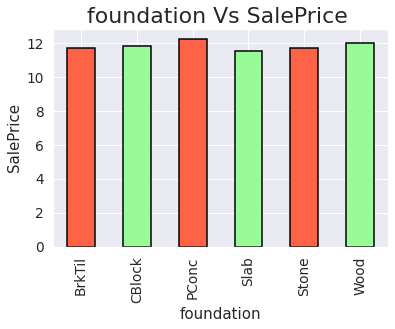

<Figure size 2160x864 with 0 Axes>

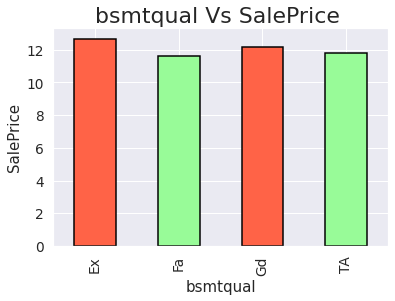

<Figure size 2160x864 with 0 Axes>

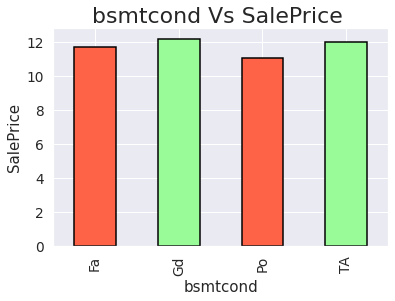

<Figure size 2160x864 with 0 Axes>

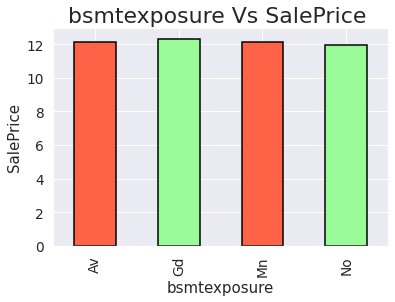

<Figure size 2160x864 with 0 Axes>

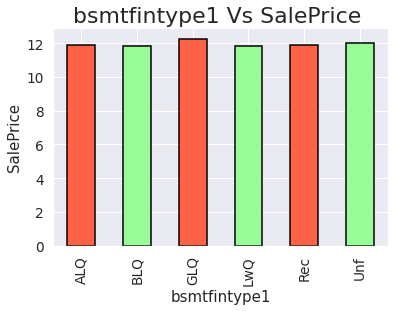

<Figure size 2160x864 with 0 Axes>

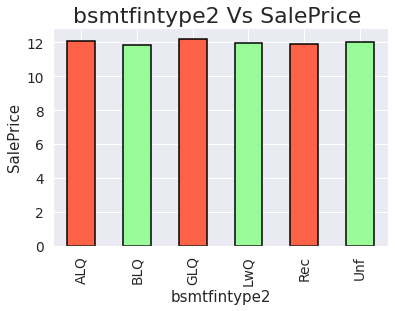

<Figure size 2160x864 with 0 Axes>

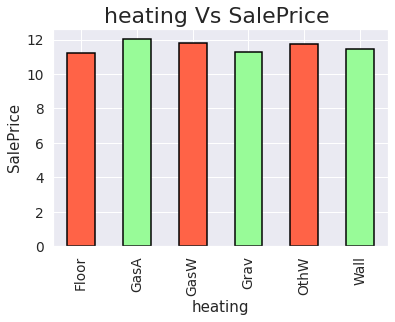

<Figure size 2160x864 with 0 Axes>

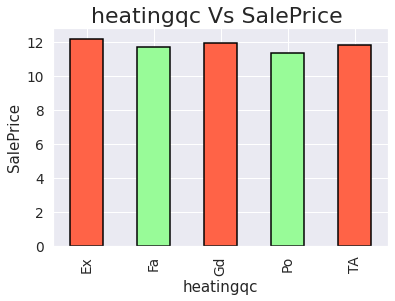

<Figure size 2160x864 with 0 Axes>

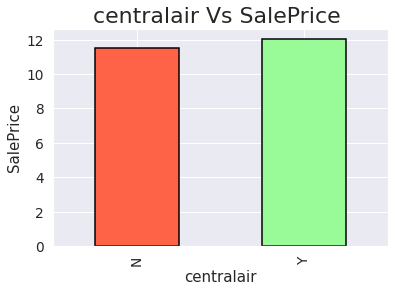

<Figure size 2160x864 with 0 Axes>

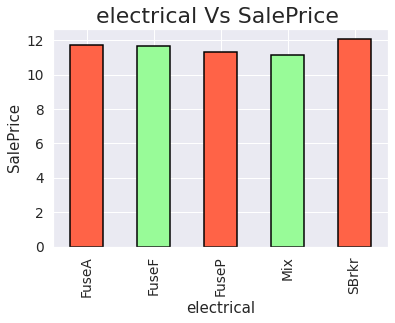

<Figure size 2160x864 with 0 Axes>

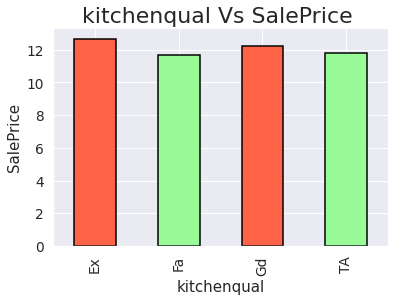

<Figure size 2160x864 with 0 Axes>

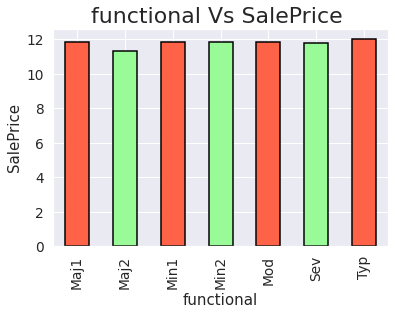

<Figure size 2160x864 with 0 Axes>

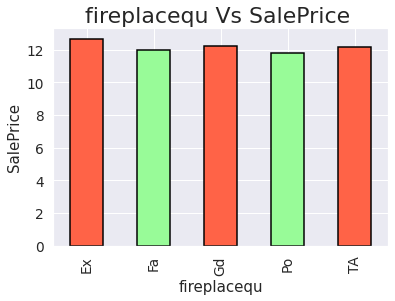

<Figure size 2160x864 with 0 Axes>

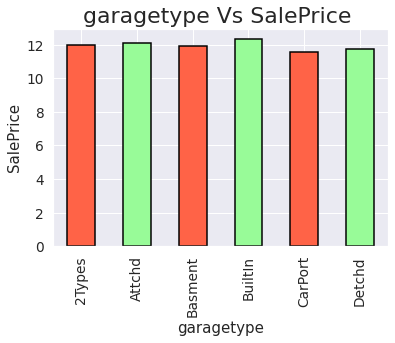

<Figure size 2160x864 with 0 Axes>

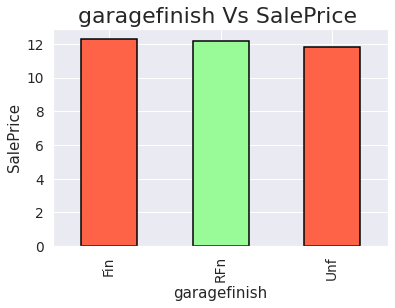

<Figure size 2160x864 with 0 Axes>

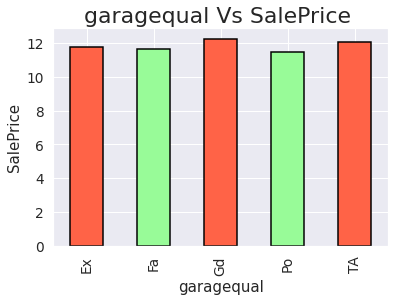

<Figure size 2160x864 with 0 Axes>

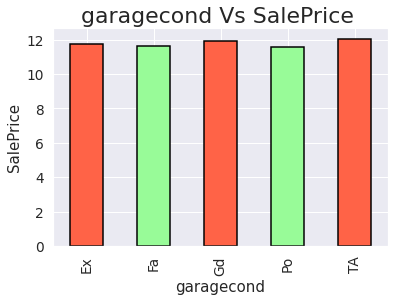

<Figure size 2160x864 with 0 Axes>

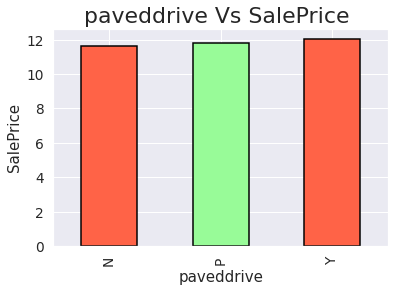

<Figure size 2160x864 with 0 Axes>

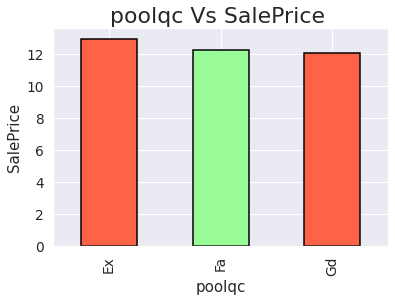

<Figure size 2160x864 with 0 Axes>

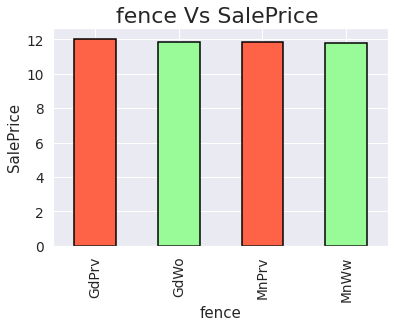

<Figure size 2160x864 with 0 Axes>

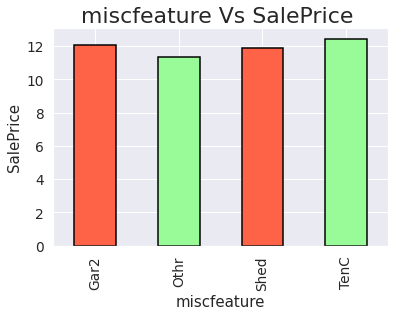

<Figure size 2160x864 with 0 Axes>

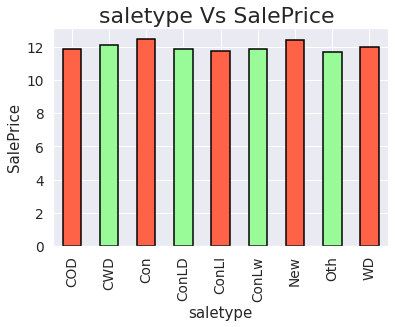

<Figure size 2160x864 with 0 Axes>

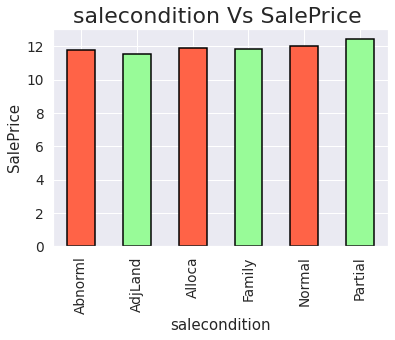

<Figure size 2160x864 with 0 Axes>

In [25]:

for feature in data_cat.columns.values:
    data=df.copy()
    colors = ["#FF6347","#98FB98"]
    data.groupby(feature)['log_saleprice'].median().plot.bar(color = colors,edgecolor = "black",linewidth = 1.5)
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel('SalePrice',fontsize = 15)
    plt.title(feature + " Vs SalePrice ",fontsize = 22)
    plt.figure(figsize=(30,12))
    plt.show()


# Feature Engineering

## Encoding Categorical Variables:

In [33]:
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [35]:
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical)

In [40]:
# Dropping Saleprice
df=df.drop(columns=['saleprice'],axis=1)

## Spliting X and Y

In [41]:

y=df[['log_saleprice']]
y.shape


(1460, 1)

In [42]:
x=df.drop(['log_saleprice'],axis=1)
x.shape

(1460, 287)

## Train-Test Split

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

## Scaling

https://medium.com/analytics-vidhya/feature-scaling-why-and-how-5247fb257887

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
 
# To scale data 
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

print("Feature space holds %d observations and %d features" % X_train.shape)

Feature space holds 1241 observations and 287 features


In [69]:
X_train.shape,X_train.shape,y_train.shape,y_test.shape

((1241, 287), (1241, 287), (1241, 1), (219, 1))

# Modeling

Base model: Linear Regression
 
Evaluation Metric: RMSE

## Base model : Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [71]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [72]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 236562699825.45157


## Hyperparameter Tuning

### Lasso

In [73]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [74]:
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize

print(' MSE: ',-(results.best_score_))

 MSE:  0.02210782332645348


In [77]:
pred_lasso = search.predict(X_test)

In [78]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

Root Mean Squared Error: 0.13228572646856712


### SVR

In [79]:
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

In [82]:
# Tuning of parameters for regression by cross-validation
K = 5               # Number of cross valiations

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K)
svr.fit(X_train, y_train)

print("Best Parameters",svr.best_params_)

Tuning hyper-parameters
Best Parameters {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [83]:
pred_svr = svr.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))

Root Mean Squared Error: 0.13435682685259182
